# Normal Modes: Ion Chain
Here we estimate normal modes of ion chains and ion pancakes using classical estimations

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats import linregress


The energy potential for N identical ions in a linear Paul trap can be estimated as identical masses connected in a 3D harmonic potential. Each ion interacts through it's positive electric charge.

$$
V(x,y) = \sum_{i=1}^{N}\left(\frac{1}{2}m \omega_x^2 x_i^2 + \frac{1}{2}m \omega_y^2 y_i^2 + \frac{1}{2}m \omega_z^2 z_i^2\right) + \sum_{i<j}^{N}\frac{e^2}{4\pi \epsilon_0 \sqrt{(x_i-x_j)^2 + (y_i-y_j)^2+ (z_i-z_j)^2}}
$$

There are $3N + \sim N^2$ terms in the potential making the problem $\sim O(N^2)$ hard.

In [169]:
# number of ions
N = 19

# constants
m = 170.936323 * 1.66054e-27
e = 1.60217662e-19
epsilon_0 = 8.85418782e-12

# harmonic frequencies
wx = 2 * np.pi * 300000
wy = wx
wz = 3.0*wx

def potential_energy(positions, wx=wx, wy=wy, wz=wz, N=N, m=m, e=e, epsilon_0=epsilon_0):
    xs = positions[:N]
    ys = positions[N:2*N]
    zs = positions[2*N:3*N]
    
    # harmonic energy
    harm_energy = np.sum(1/2 * m * (wx**2 * xs**2 + wy**2 * ys**2 + wz**2 * zs**2))

    # electronic interaction
    interaction = 0
    for i in range(N):
        for j in range(i+1,N):
            interaction += 1/np.sqrt((xs[i]-xs[j])**2 + (ys[i]-ys[j])**2 + (zs[i]-zs[j])**2)
    interaction = e**2/4/np.pi/epsilon_0 * interaction

    return harm_energy + interaction

print('alpha',wz/wx)

alpha 3.0


In [170]:
# Initial guess and minimization
x0 = np.array(list(np.linspace(-N,N,N+1)) * 2 + [0]*N)*1e-6
res = minimize(potential_energy, x0, method='CG', tol=1e-18)

# Educated guess. 2nd minimization
x0 = res.x
res = minimize(potential_energy, x0, method='Nelder-Mead', tol=1e-18)
res.x

array([-7.29869855e-06, -7.66812126e-06, -1.23480095e-05, -3.93700245e-06,
       -1.51959019e-05,  8.57958482e-09,  3.50813507e-06, -1.18457683e-05,
       -7.57243137e-06,  7.69236738e-06,  1.24295867e-05,  7.41668242e-06,
       -2.73169579e-08, -3.76686961e-06,  3.73098581e-06,  1.50595814e-05,
        7.86564581e-08,  1.17704199e-05,  7.41928310e-06,  1.33009212e-05,
       -1.29849407e-05, -6.77179100e-06, -6.44240712e-06,  6.95415984e-07,
       -1.41937637e-05, -6.75249123e-06,  7.30011638e-06, -6.62296563e-08,
       -1.28973792e-05, -6.76417794e-06, -5.28997792e-07, -2.00787134e-07,
        6.27737080e-06,  6.13571831e-06,  6.88008385e-07,  1.37852198e-05,
        7.11882109e-06,  1.30688858e-05,  4.42155257e-08,  9.08245162e-09,
       -1.58884458e-08, -1.55127055e-08,  4.35288690e-08,  2.47574057e-08,
        7.20717262e-08,  4.42718704e-08,  3.57389496e-08, -4.67315637e-08,
       -2.01190084e-09,  1.35066178e-08,  2.11584774e-08,  5.35836019e-08,
       -8.95106796e-09,  

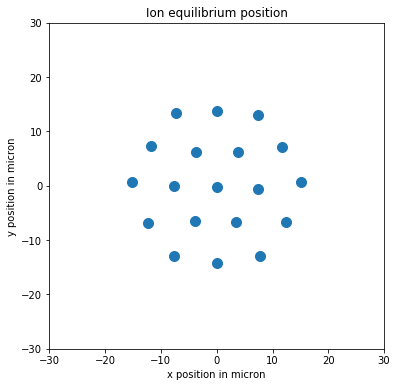

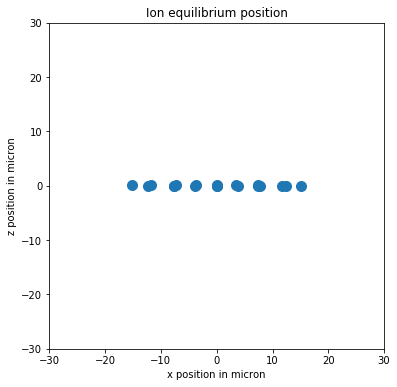

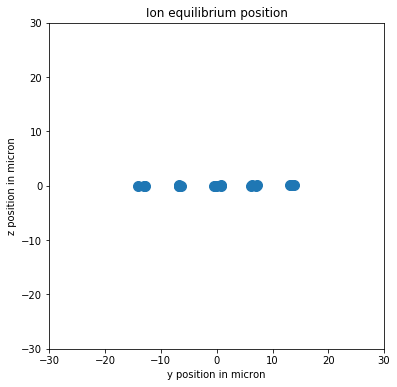

In [171]:
# Plot radial plane
xs = res.x[:N] * 1e6
ys = res.x[N:2*N] * 1e6
zs = res.x[2*N:3*N] * 1e6

plt.figure(figsize=(6,6))
plt.scatter(xs,ys, marker='o',s = 100)
plt.title('Ion equilibrium position')
plt.xlabel('x position in micron')
plt.ylabel('y position in micron')
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(xs,zs, marker='o',s = 100)
plt.title('Ion equilibrium position')
plt.xlabel('x position in micron')
plt.ylabel('z position in micron')
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(ys,zs, marker='o',s = 100)
plt.title('Ion equilibrium position')
plt.xlabel('y position in micron')
plt.ylabel('z position in micron')
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

### Normal Modes
Ions motion can be used to send quantum information through the crystal. To do this, it's essential to know the normal modes of the ions. Let's compute them based on the ion positions